### CNN-YAPAY SİNİR AĞLARI (Kütüphanesi Keras-Tensorflow)

### DEEP LEARNİNG YAPARAK FOTOĞRAFLARDAKİ NESNELERİ TANIMA 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers ,models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [9]:
X_test.shape  # 32x32 tane 10000 veri var ve RGB =3

(10000, 32, 32, 3)

In [10]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)  # 2 boyutluyu 1 boyutluya dönüştürdük.
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

### Kendimiz bir array oluşturmak istiyoruz.

In [7]:
resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X,y,index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(resim_siniflari[y[index]])

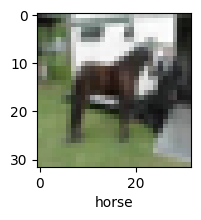

In [9]:
plot_sample(X_test,y_test,20)

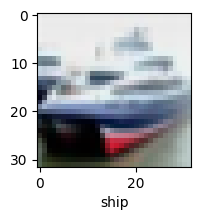

In [10]:
plot_sample(X_test,y_test,1)

### Normalization

In [11]:
X_train = X_train /255 #RGB Değeri 0-255 arasında oldugu için 
X_test = X_test /255

### Deep Learning Algoritmamızın (CNN Tasarımını Yapıyoruz.)

In [12]:
deep_learning_model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
deep_learning_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 35s 21ms/step - loss: 1.4926 - accuracy: 0.4602
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1405 - accuracy: 0.5984
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0034 - accuracy: 0.6523
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9225 - accuracy: 0.6815
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8643 - accuracy: 0.7004


In [15]:
deep_learning_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9602 - accuracy: 0.6757


[0.9601866006851196, 0.6757000088691711]

In [16]:
y_pred = deep_learning_model.predict(X_test)
y_pred[:3]

313/313 [==============================] - 2s 6ms/step


array([[1.44536409e-03, 3.79313744e-04, 1.38813779e-02, 6.85780346e-01,
        8.77386134e-04, 4.97562103e-02, 7.17887580e-02, 2.63185575e-05,
        1.75166532e-01, 8.98415514e-04],
       [3.78456824e-02, 6.85982764e-01, 3.22364242e-04, 2.11323622e-05,
        5.45725707e-05, 8.34247430e-07, 1.71567729e-06, 7.03130127e-07,
        2.73354888e-01, 2.41536042e-03],
       [1.35287687e-01, 3.38301629e-01, 1.68297570e-02, 1.49807595e-02,
        1.43407388e-02, 1.53318967e-03, 1.04523299e-03, 6.47890475e-03,
        4.41276163e-01, 2.99258847e-02]], dtype=float32)

In [17]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred]
y_predictions_siniflari[:3]

[3, 1, 8]

In [18]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

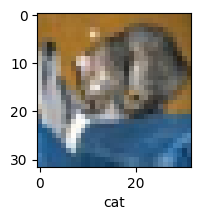

In [19]:
plot_sample(X_test, y_test,0)

In [20]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

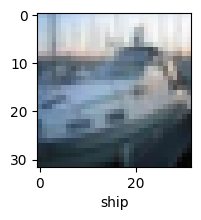

In [21]:
plot_sample(X_test, y_test,2)

In [22]:
resim_siniflari[y_predictions_siniflari[2]]

'ship'

### AİRLANE PASSENGER (TİME SERİES) PREDİCTİON - LSTM(Long Short-Term Memory İLE UÇAK YOLCU SAYISI TAHMİNİ

100 tane verdikten sonra verinin geri kalanını LSTM ile öğrenme olayıdır

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM #
from tensorflow.keras.models import Sequential #
from sklearn.preprocessing import MinMaxScaler #


In [12]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
data.rename(columns={"#Passengers":"passengers"},inplace=True)
data = data ["passengers"]

In [14]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [15]:
type(data) # series olmaz dataframe yada numpyframe

pandas.core.series.Series

Series yerine ya dataframe yada numpyframe kullanıcaz

In [19]:
data = np.array(data).reshape(-1,1)

In [20]:
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [21]:
type(data)

numpy.ndarray

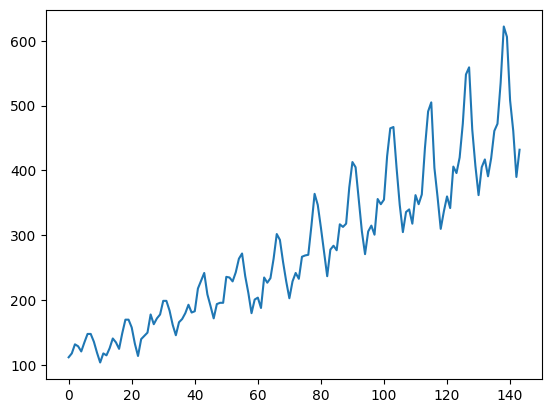

In [23]:
plt.plot(data)
plt.show()

### Scalling işlemi kullanmamız gerekiyor.(Sayısal değerleri 0 ve 1 yapma işlemidir.)

In [24]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [25]:
len(data)

144

In [28]:
train = data[0:100,:]  # ilk yüzünü train etmek için geri kalan 44 veriyi test için kullanıyorum
test = data[100:,:]

LTSM in temel amacı kendi veri setimizi oluşturmaktır. Model oluştamayacağımız veri setlerinde
kullanılır. Bu veri setinde steps sayısı kaçsa ona göre o 2 adımı veriye yüklemez ve 3.veriyi
sete yükler ver 0. veriden 1. adıma atlayarak aynı işlemi yapmaya devam eder. Yani ilk verimiz 112
ikinci verimiz 118 ise 3.verimiz 132 ise onu hafızaya kaydeder sonra bırdaha baştan degılde bir sonraki veriden devam eder ve onada aynı işlemı uygular.
100 tane train için ve geri kalanıda test için yapılır.Test içinde aynı işlemler yapılır.

In [47]:
def get_data(data ,steps):
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a=data[i:(i+steps)]
        dataX.append(a)
        dataY.append(data[i+steps,0])
    return np.array(dataX),np.array(dataY)

In [48]:
steps = 2 # steps değerimizi 2 olarak belirledik

In [49]:
X_train ,y_train =get_data(train,steps) # modelimizi eğittik.
X_test ,y_test =get_data(test,steps)

In [50]:
X_train =np.reshape(X_train,(X_train.shape[0], 1,X_train.shape[1]))
X_test =np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

X_train: yeniden boyutlandırılacak dizi
X_train.shape[0]: X_train dizisindeki satır sayısı
1: X_train dizisine eklenecek yeni boyut
X_train.shape[1]: X_train dizisindeki sütun sayısı

Aynı işlem, X_test dizisi için de uygulanır. Bu işlem sonucunda, X_train ve X_test dizileri sırasıyla (örnek sayısı, 1, özellik sayısı) ve (test örneği sayısı, 1, özellik sayısı) şeklinde 3 boyutlu hale gelir. Bu şekilde, bu diziler doğrudan birçok yaygın makine öğrenimi modeline girdi olarak verilebilir.

In [51]:
model = Sequential()  # yapay sinir ağlarını oluşturmamızı sağlayan katmanları üst üste ekleyebilen yapıdır.
model.add(LSTM(128,input_shape =(1,steps)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss ="mean_squared_error",optimizer ="adam")

Modelimize, LSTM sınıfından bir öğrenme katmanı ekliyoruz. LSTM (Long Short-Term Memory) bir tür uzun-kısa dönem bellekli rekürrent sinir ağıdır. 
Bu katman, özellikle zaman serileri gibi sıralı verilerin analizi için kullanılır.
Modelimize ikinci bir yoğun katman (Dense) ekliyoruz. Bu katmanın 64 hücresi olacak.
Modelimize üçüncü bir yoğun katman daha ekliyoruz, ancak bu katmanın yalnızca 1 hücresi vardır. Bu, modelimizin çıktısını tek bir değerde döndürmesini sağlar
Son olarak, compile() yöntemini kullanarak modelimizin kaybı ve optimize ediciyi belirliyoruz. Kaybı, ortalama karesel hata (mean_squared_error) olarak belirliyoruz. Bu, modelimizin tahminleriyle gerçek veriler arasındaki farkın karesinin ortalamasıdır. Optimize edici olarak, adam yöntemini kullanıyoruz. Adam, gradient iniş optimizasyon yöntemlerinden biridir ve ağırlıkların güncellenmesinde oldukça etkilidir.

input_shape=(1, steps) burada LSTM katmanına verilecek girdi verinin boyutunu belirler. 

Dense bir Keras katman türüdür ve tam bağlantılı bir yapay sinir ağı katmanını temsil eder. Bu katman, her bir önceki katmandaki tüm nöronların her bir nöronla bağlantılı olduğu bir ağ oluşturur.

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,393
Trainable params: 75,393
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,epochs=25,batch_size=1)

Epoch 1/25
97/97 [==============================] - 2s 3ms/step - loss: 0.0088
Epoch 2/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 3/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 4/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 5/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 6/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 7/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 8/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 10/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 11/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/25
97/97 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 13/25
97/97 [==============================

In [54]:
y_pred =model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [55]:
y_pred =scaler.inverse_transform(y_pred)
y_test =y_test.reshape(-1,1)
y_test =scaler.inverse_transform(y_test)

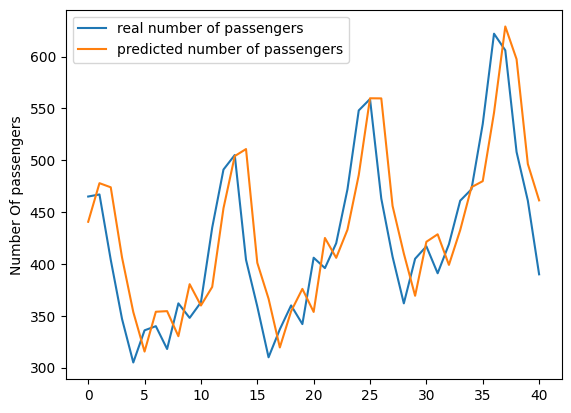

In [56]:
plt.plot(y_test,label ="real number of passengers")
plt.plot(y_pred,label ="predicted number of passengers")
plt.ylabel("Months")
plt.ylabel("Number Of passengers")
plt.legend()
plt.show()

Bu kod bloğu, yapılan tahminlerin ölçeğinden çıkartılarak gerçek değerlere dönüştürülmesini sağlar.

İlk satır, y_pred değişkeninde saklanan tahminleri ters ölçekleme yoluyla gerçek değerlere dönüştürür. Ters ölçekleme, MinMaxScaler veya StandardScaler gibi bir ölçeklendirme işlemi yapıldıktan sonra, verilerin orijinal ölçeklerine dönüştürülmesi işlemidir.



### IMAGE CLASSİFİCATİON USİNG TRANSFER LEARNİNG(İnceptionResNetV2)

1.281.167 eğitim görüntüsü ve 50.00 doğrulama ve 100.000 test görüntüsü içerir.
Eğitilmiş bir modeldir.Yani hazır bir modeldir.

İnceptionResNetV2 görüntüleri klavye,fare kurşun kalem ve birçok hayvan 
gibi 1000 nesne katagorisine ayırır.299x299 olması gerekır

residual Network ana katmanları hatırlatmaya yarar

Inception ve resnet modelini kullanıcaz.Transfer learning yapılan çalışmaları bir model haline getirip hazır bir model oluşturur.

In [7]:
import numpy as np
from PIL import Image  # Resimler açan kütüphane PIL dir.Görüntü büyüklüğünü belirlemek adınada kullanılır
from IPython.display import Image as show_image #Test Resimmlerini göstermek için kullanılır.
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 # kullanıcagımız modelin kütüphanesını yazdım.
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input, decode_predictions # fotografları process etmek için gerekli kütüphane


In [43]:
img = Image.open("plane.jpg").resize((299,299))

In [44]:
type(img)

PIL.Image.Image

In [45]:
img = np.array(img) # numpy dçnüştürdük matematiksek bir hale getirdik.

In [46]:
type(img)

numpy.ndarray

In [47]:
img.shape  # 299x299 3 boyutlu

(299, 299, 3)

İnceptionResNetV2 4 boyutlu model istiyor. 1boyut daha katmamız lazım.

In [48]:
print(img.ndim) # 3 boyutlu

3


In [49]:
img = img.reshape(-1,299,299,3) # bir boyut daha ekledik.

In [50]:
print(img.ndim)

4


In [51]:
img.shape

(1, 299, 299, 3)

In [52]:
img =  preprocess_input(img) #scale ettik resmimizi -1 ile 1 arasında oldu

In [53]:
incresv2_model = InceptionResNetV2(weights="imagenet",classes=1000)

In [54]:
print(incresv2_model.summary())

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 149, 149, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                               

 batch_normalization_208 (Batch  (None, 35, 35, 96)  288         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 35, 35, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 35, 35, 96)  288         ['conv2d_213[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 35, 35, 64)  192         ['conv2d_214[0][0]']             
 Normaliza

 activation_224 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_224[0][0]']
                                                                                                  
 conv2d_222 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_225 (Conv2D)            (None, 35, 35, 48)   13824       ['activation_224[0][0]']         
                                                                                                  
 batch_normalization_222 (Batch  (None, 35, 35, 32)  96          ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_225 (Batch  (None, 35, 35, 48)  144         ['conv2d_225[0][0]']             
 Normaliza

                                                                                                  
 activation_227 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_227[0][0]']
                                                                                                  
 activation_229 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_229[0][0]']
                                                                                                  
 activation_232 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_232[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_227[0][0]',         
                                                                  'activation_229[0][0]',         
                                                                  'activation_232[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_243 (Batch  (None, 35, 35, 48)  144         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_240 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_240[0][0]']
                                                                                                  
 activation_243 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 35, 35, 128)  0           ['activation_245[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_250[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 35, 35, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 custom_scale_layer_45 (CustomS  (None, 35, 35, 320)  0          ['block35_5_ac[0][0]',           
 caleLayer)                                                       'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 35, 35, 320)  0           ['custom_scale_layer_45[0][0]']  
          

 activation_261 (Activation)    (None, 35, 35, 48)   0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_257 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_259 (Conv2D)            (None, 35, 35, 32)   9216        ['activation_258[0][0]']         
                                                                                                  
 conv2d_262 (Conv2D)            (None, 35, 35, 64)   27648       ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_257 (Batch  (None, 35, 35, 32)  96          ['conv2d_257[0][0]']             
 Normalization)                                                                                   
          

 caleLayer)                                                       'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 35, 35, 320)  0           ['custom_scale_layer_48[0][0]']  
                                                                                                  
 conv2d_272 (Conv2D)            (None, 35, 35, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_272 (Batch  (None, 35, 35, 32)  96          ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_272 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_272[0][0]']
          

 activation_278 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_278[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 17, 17, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 17, 17, 1088  0           ['activation_275[0][0]',         
                                )                                 'activation_278[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_280 (Conv2D)            (None, 17, 17, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

 caleLayer)                     )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 17, 17, 1088  0           ['custom_scale_layer_51[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_288 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_288 (Batch  (None, 17, 17, 128)  384        ['conv2d_288[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_296 (Conv2D)            (None, 17, 17, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_296 (Batch  (None, 17, 17, 128)  384        ['conv2d_296[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_296 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_296[0][0]']
                                                                                                  
 conv2d_297 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_296[0][0]']         
          

                                                                                                  
 batch_normalization_304 (Batch  (None, 17, 17, 128)  384        ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_305 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_305 (Batch  (None, 17, 17, 160)  480        ['conv2d_305[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_312 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_312[0][0]']
                                                                                                  
 conv2d_313 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_312[0][0]']         
                                                                                                  
 batch_normalization_313 (Batch  (None, 17, 17, 160)  480        ['conv2d_313[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_313 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_313[0][0]']
                                                                                                  
 conv2d_31

 conv2d_321 (Conv2D)            (None, 17, 17, 160)  143360      ['activation_320[0][0]']         
                                                                                                  
 batch_normalization_321 (Batch  (None, 17, 17, 160)  480        ['conv2d_321[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_321 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_321[0][0]']
                                                                                                  
 conv2d_319 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_322 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_321[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_329 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_329[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_330 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_329[0][0]']         
                                                                                                  
 batch_normalization_327 (Batch  (None, 17, 17, 192)  576        ['conv2d_327[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_335 (Conv2D)            (None, 17, 17, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_338 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_337[0][0]']         
                                                                                                  
 batch_normalization_335 (Batch  (None, 17, 17, 192)  576        ['conv2d_335[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_338 (Batch  (None, 17, 17, 192)  576        ['conv2d_338[0][0]']             
 Normalization)                                                                                   
          

 conv2d_346 (Conv2D)            (None, 17, 17, 192)  215040      ['activation_345[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 17, 17, 192)  576        ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_346 (Batch  (None, 17, 17, 192)  576        ['conv2d_346[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_343 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_343[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_354 (Batch  (None, 17, 17, 192)  576        ['conv2d_354[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_351 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_351[0][0]']
                                                                                                  
 activation_354 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_354[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 17, 17, 384)  0          ['activation_351[0][0]',         
          

 activation_359 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_359[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 17, 17, 288)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 conv2d_360 (Conv2D)            (None, 8, 8, 384)    884736      ['activation_359[0][0]']         
                                                                                                  
 conv2d_362 (Conv2D)            (None, 8, 8, 288)    663552      ['activation_361[0][0]']         
                                                                                                  
 conv2d_36

                                                                                                  
 activation_372 (Activation)    (None, 8, 8, 224)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 conv2d_370 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_373 (Conv2D)            (None, 8, 8, 256)    172032      ['activation_372[0][0]']         
                                                                                                  
 batch_normalization_370 (Batch  (None, 8, 8, 192)   576         ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_378 (Batch  (None, 8, 8, 192)   576         ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_381 (Batch  (None, 8, 8, 256)   768         ['conv2d_381[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_378 (Activation)    (None, 8, 8, 192)    0           ['batch_normalization_378[0][0]']
                                                                                                  
 activation_381 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_381[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_389 (Activation)    (None, 8, 8, 256)    0           ['batch_normalization_389[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 8, 8, 448)    0           ['activation_386[0][0]',         
                                                                  'activation_389[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 8, 8, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 custom_scale_layer_75 (CustomS  (None, 8, 8, 2080)  0           ['block8_5_ac[0][0]',            
 caleLayer)                                                       'block8_6_conv[0][0]']          
          

                                                                                                  
 custom_scale_layer_77 (CustomS  (None, 8, 8, 2080)  0           ['block8_7_ac[0][0]',            
 caleLayer)                                                       'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 8, 8, 2080)   0           ['custom_scale_layer_77[0][0]']  
                                                                                                  
 conv2d_399 (Conv2D)            (None, 8, 8, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_399 (Batch  (None, 8, 8, 192)   576         ['conv2d_399[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 8, 8, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 1536)        0           ['conv_7b_ac[0][0]']             
 2D)                                                                                              
                                                                                                  
 predictions (Dense)            (None, 1000)         1537000     ['avg_pool[0][0]']               
                                                                                                  
Total params: 55,873,736
Trainable params: 55,813,192
Non-trainable params: 60,544
__________________________

In [55]:
print(type(incresv2_model))

<class 'keras.engine.functional.Functional'>


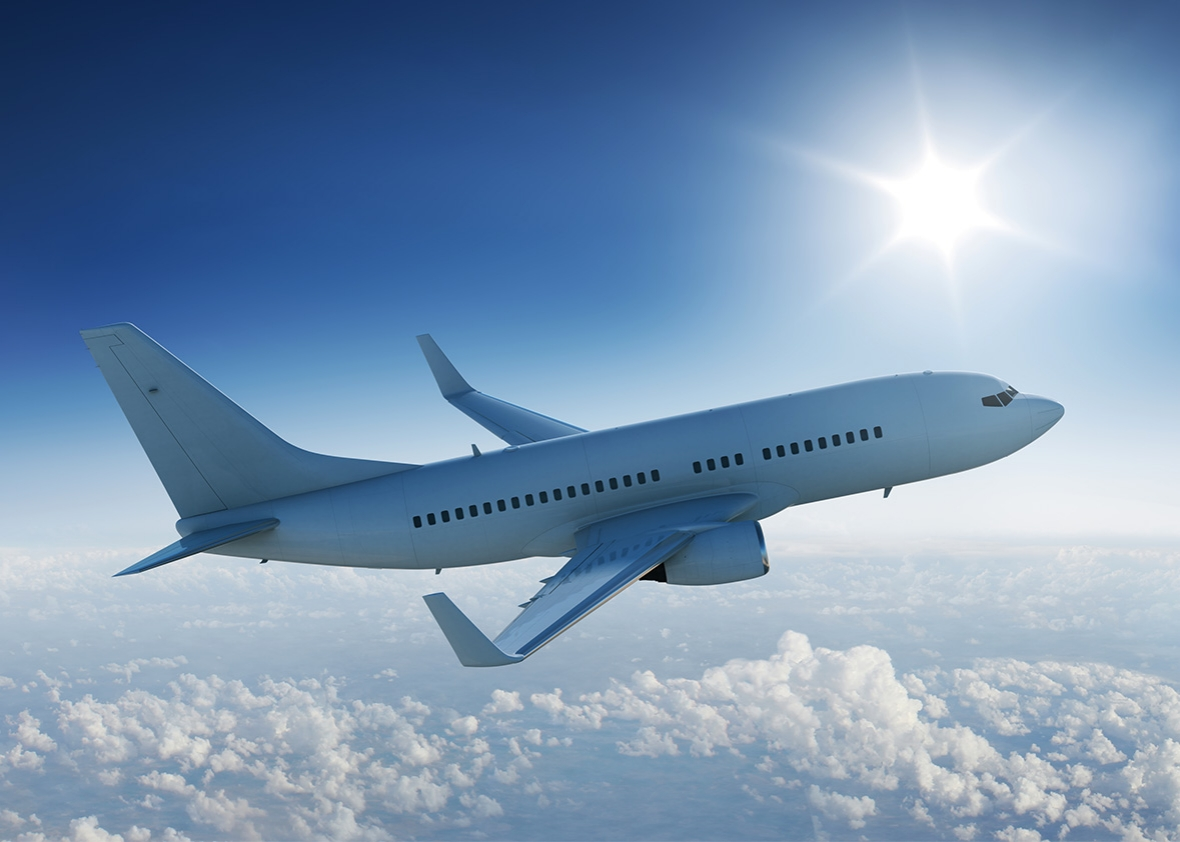

In [56]:
show_image(filename="plane.jpg")

In [57]:
preds = incresv2_model.predict(img)
print("Predicted categories:", decode_predictions(preds,top=2)[0]) # 2tane tahmin yapmasını istiyorum

1/1 [==============================] - 3s 3s/step
Predicted categories: [('n02690373', 'airliner', 0.7949774), ('n04592741', 'wing', 0.10399764)]


## Reshape

In [59]:
import numpy as np

In [60]:
arr = np.arange(24)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [61]:
arr.shape

(24,)

In [62]:
arr.ndim

1

In [63]:
arr =arr.reshape(-1,24)

In [64]:
arr.ndim

2

In [67]:
arr =arr.reshape(-1,24)

In [66]:
arr.ndim

2

In [68]:
arr

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23]])

In [70]:
arr =arr.reshape(-1,1,24)

In [71]:
arr

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
         16, 17, 18, 19, 20, 21, 22, 23]]])

### DEEP LEARNİNG İLE UYDU FOTOĞRAFLARINDAKİ ASKERİ UÇAK MODELLERİNİN TESPİT VE SINIFLANDIRMA PROJESİ (VGG16 )

1-Bu projede hem eğitim hem de test için kendi özel veri setimizi kullanacağız
2.  VGG16 önceden eğitilmiş karmaşık derin öğrenme modelini kullanacağız.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img #Görüntü işlemleri için
from tensorflow.keras.models import Sequential # Bunlar yeni modelimizi oluşturmak için gereklidir.
from tensorflow.keras.layers import Dense #  Yeni modelimizi oluşturmak için bunlar gereklidir
from tensorflow.keras.applications.vgg16 import VGG16  # Bu projede kullanılacak Transfer Learning modeli...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Görüntü açma, görüntüyü yeniden boyutlandırma, vb.
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_files_path ="airplanedataset/Train/"
test_files_path ="airplanedataset/Test/"

img = load_img(test_files_path + "B-52/3-1.jpg")

In [6]:
print(img_to_array(img).shape)

(230, 266, 3)


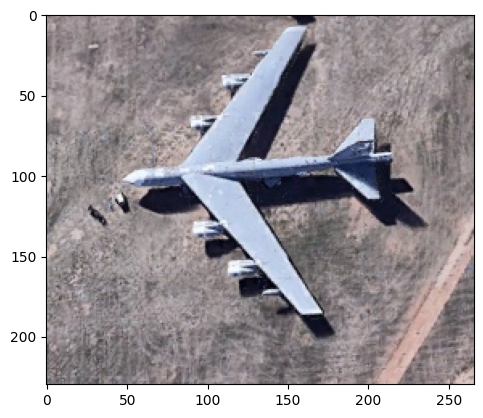

In [7]:
plt.imshow(img)
plt.show()

#### Uçak Resimlerinin test ve train verilerini ayarmalarını yaptık.(224,224) ü VGG16 modeli böyle istediği için yaptık.

In [8]:
train_data =ImageDataGenerator().flow_from_directory(train_files_path,target_size=(224,224))
test_data =ImageDataGenerator().flow_from_directory(test_files_path,target_size=(224,224))

Found 1812 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [9]:
numberOfAirplaneTypes = 5   # 5 adet uçak tipimiz olduğunu belirliyoruz.


## Modelimizi Oluşturmaya Başlıyoruz. VGG16 nın layerlerını kullanarak yeni bir model oluşturucaz

In [10]:
vgg =VGG16() # içinde bir sürü veri seti bulunduran hazır veri setidir.

In [11]:
vgg_layers = vgg.layers  # vgg.layers içine katmanlarını aldık.
print(vgg.layers)

[<keras.engine.input_layer.InputLayer object at 0x000001CF11CFB460>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF0FBB5910>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11CFB310>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001CF11D4C070>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF0FC89190>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D61550>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001CF11D5F1C0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D612E0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D6D640>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D5F4F0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001CF11D7A400>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D73670>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000001CF11D817F0>, <keras.layers.convolutional.conv2d

In [12]:
# kendimiz yeni bir model oluşturuyoruz.
vggmodel_layersize_tobe_used = len(vgg_layers)-1 # en sondakı değer dışında diğer değerleri aldık.
#output modeli almadık çünkü 1000 tane ımage catogiers in layerini almadık.
model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [13]:
for layers in model.layers:   # 15 tanesini yani layerleri train etmek istemiyoruz oy
    layers.trainable = False  # False etmeseydık complex katmanlarını tekrar train etmek zorunda kalırdık.
model.add(Dense(numberOfAirplaneTypes,activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
model.compile(loss="categorical_crossentropy",
      optimizer ="rmsprop",
      metrics = ["accuracy"])

Bu kod, bir keras modelinin derlenmesi (compile edilmesi) için kullanılır.

"loss" parametresi, modelin eğitim sırasında kullanacağı kayıp fonksiyonunu belirler. Bu örnekte "categorical_crossentropy" seçilmiş, bu da çoklu sınıflı sınıflandırma problemleri için yaygın olarak kullanılan bir kayıp fonksiyonudur.

"optimizer" parametresi, modelin eğitim sırasında kullanacağı optimize ediciyi belirler. Bu örnekte "rmsprop" seçilmiş, bu da yaygın bir optimize edici algoritmadır.

"metrics" parametresi, modelin performansını değerlendirmek için kullanılacak metrikleri belirler. Bu örnekte "accuracy" seçilmiş, bu da doğruluk (accuracy) metriği olarak adlandırılan bir performans ölçüsüdür.

In [ ]:
batch_size = 4 

model.fit_generator(train_data,
                           steps_per_epoch=400//batch_size,
                           epochs= 3, # You can increase epoch size if you have a computer with good specs...
                           validation_data=test_data,
                           validation_steps= 200//batch_size)

Epoch 1/3


C:\Users\Kaan Kubilay Özdemir\AppData\Local\Temp\ipykernel_18740\1646758556.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


  1/100 [..............................] - ETA: 7:29 - loss: 3.4456 - accuracy: 0.2188

 accuracy : train data setimizin val_accuracy: test setimizin başarısıdır.

In [1]:
img = Image.open("f22.jpg").resize((224,224))

NameError: name 'Image' is not defined

In [19]:
img =np.array(img)

In [20]:
img.shape

(230, 266, 3)

In [21]:
img.shape

(230, 266, 3)

In [22]:
print(img.ndim)

3


In [24]:
img =img.reshape(-1,230, 266, 3)

In [25]:
print(img.shape)
print(img.ndim)

(1, 230, 266, 3)
4


In [26]:
img = preprocess_input(img)

In [ ]:
img_for_display = load_img("a10.jpg")
plt.imshow(img_for_display)
plt.show()


## DEEP LEARNİNG İÇİN SES SİNYAL İŞLEME PROJESİ

1-Adım Veri setimizi analiz için hazırlayacağız ve Mel-Frekans Cepstral Katsayılarını (MFCS) kullanarak ses dosyalarından ses sinyali özelliklerini çıkaracağız.

2-Adım Daha sonra bir Evrişimli Sinir Ağları (CNN) modeli oluşturacağız ve modelimizi veri setimiz ile eğiteceğiz.

3-Son olarak, modelimizi kullanarak bir ses dosyasının sınıfını tahmin ediyoruz.

## 1.ADIM

In [1]:
import tensorflow as tf # version kontrol yapılır.
print(tf.__version__)

2.12.0


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa  # mfc leri çıkartmamızı sağlayan kütüphane ses sinyallerinin karakteristik özelliklerini elde edeceğiz.
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [3]:
audio_file_path='UrbanSound8K/17973-2-0-32.wav'

librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [4]:
print(librosa_audio_data) # analiz etti oluşturdugumuz sesi.Ses dosyasını digital hale getirdik.

[ 0.0591024   0.04647241 -0.02115159 ... -0.0069612   0.03259261
  0.09148587]


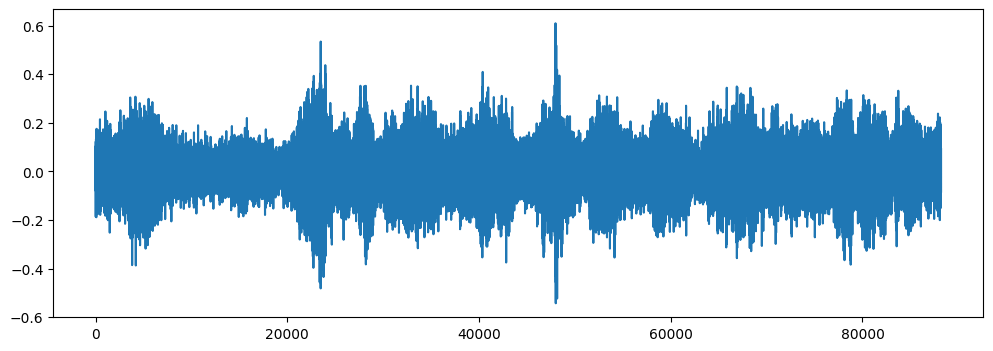

In [5]:
 #mono bir sinyal haline getirme işlemi
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.show()

In [6]:
from scipy.io import wavfile as wav  # 2 farklı ses sitemi oldugunu gördük
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [7]:
wave_audio

array([[2189, 3314],
       [1592, 2598],
       [ 848, 1712],
       ...,
       [1326, 2602],
       [1915, 3542],
       [2542, 4449]], dtype=int16)

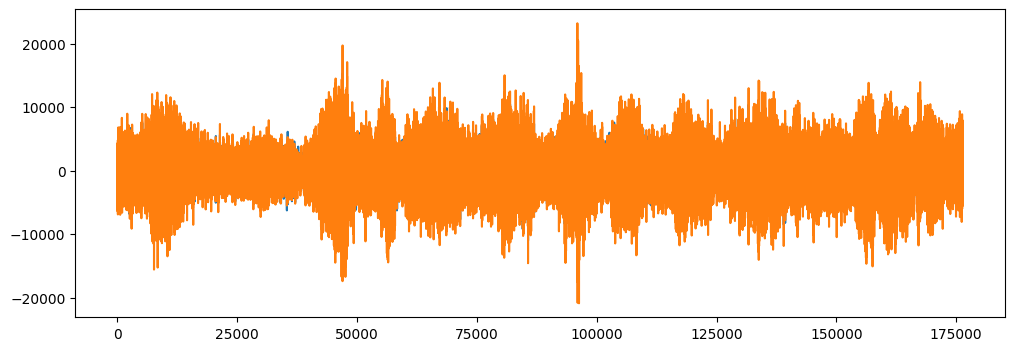

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)
plt.show()

## Feature Extraction (Özellik Çıkarma)

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data , sr =librosa_sample_rate,n_mfcc=40) #kaç tane öznitelik çıkarıyım anlamına geliyor
print(mfccs.shape)

(40, 173)


40 tane clasification için kullanıcagım digital değerleri gösterir.

In [10]:
mfccs

array([[-166.06232  , -151.50264  , -172.7387   , ..., -192.53252  ,
        -179.10657  , -179.59177  ],
       [  75.67847  ,   93.39499  ,  109.31447  , ...,  107.66586  ,
          87.264244 ,   67.258606 ],
       [-107.505295 , -118.782585 , -128.7536   , ..., -112.772415 ,
         -97.96595  ,  -85.718735 ],
       ...,
       [  -9.795128 ,   -8.940213 ,  -14.132217 , ...,   -6.595044 ,
          -2.1138759,   -5.7154036],
       [   5.047469 ,    3.6141496,    5.1923437, ...,   -4.643526 ,
         -11.839522 ,  -17.177223 ],
       [   4.929693 ,    7.550996 ,    7.043157 , ...,   -2.6938524,
          -6.5428867,   -7.347314 ]], dtype=float32)

 Sadece tek bir ses için değilde her dosyaya uygulamak istiyoruz

In [11]:
audio_dataset_path = "UrbanSound8K/audio/ "
metadata =pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [12]:
def features_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')  # ses dosyalarını yüklemek ve işlemek için kullanılır.
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)  # o çıkardıgımız 40 mfcc ozellıglını gostermeye yarar
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0) # ölçegını ayarlamak için kullanılır.
    
    return mfccs_scaled_features # ve mfc degerlerını bu degıskene atar

In [13]:
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
import resampy

extracted_features=[] # dizilerdeki seslerin hepsını ımport edıyor ve yenı dosyanın içine atıyor
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3554it [04:48, 12.04it/s]C:\Users\Kaan Kubilay Özdemir\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [12:36, 13.77it/s]C:\Users\Kaan Kubilay Özdemir\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [12:36, 16.88it/s]C:\Users\Kaan Kubilay Özdemir\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [13:17, 10.94it/s]
